# Clase Nº 6

**Plan de la clase:**  
**(1)** Aprendizaje automático o _machine learning_ (con la librería `scikit-learn`)
 - Aprendizaje supervisado <br>
 - Aprendizaje no supervisado 

**(2)** Aprendizaje profundo o _deep learning_ (con la librería `pytorch`)<br>

En esta sección vamos a usar la librería `scikit-learn`.
Para instalarla, basta ejecutar `conda install scikit-learn ` en la consola.

`Scikit-learn` provee una serie de funcionalidades útiles para entrenar algoritmos de aprendizaje automático.


## Aprendizaje automático

In [1]:
import sklearn

### Aprendizaje supervisado

#### Regresión lineal

In [2]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In /home/rodrigo/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rodrigo/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rodrigo/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/rodrigo/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rodrigo/anaconda3/lib/python3.7/site-packages/m

In [3]:
N = 1000 # Número de observaciones
M = 3 # Número de predictores (features)
beta = np.random.randn(M,1) * 2 # Efecto de cada predictor en la variable "respuesta" (Y)

Simulemos los "datos", $X$, y los efectos $\beta$ de cada predictor en la respuesta :

In [4]:
X = 2 *(np.random.random((N,M)) - 0.5) # los "datos" (uniforme en [-1,1])
print("Datos (primeras 5 filas):\n", X[:5],"\n...\n")
print("Efectos:\n",beta)

Datos (primeras 5 filas):
 [[-0.13628122 -0.15878092 -0.70857129]
 [-0.04036345  0.16695974 -0.0970873 ]
 [-0.61890104 -0.82437464 -0.02133795]
 [ 0.44590057  0.99445721  0.2453733 ]
 [-0.94661712 -0.42659129 -0.1257783 ]] 
...

Efectos:
 [[ 2.63948701]
 [-0.67222323]
 [-1.98945287]]


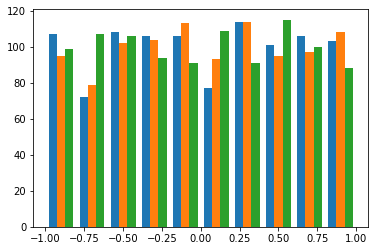

In [5]:
plt.hist(X)
plt.show()

Ahora simulemos las respuestas (o "etiquetas") $y=X\beta+\epsilon$, donde $\epsilon\sim \mathcal{N}(0,\sigma^2)$
Primero, chequeemos las dimensiones:

In [6]:
y = X.dot(beta)
print(X.shape, "*", beta.shape, " = ", y.shape)

(1000, 3) * (3, 1)  =  (1000, 1)


In [7]:
sigma = 1
ruido = np.random.randn(N,1) * sigma
y = y + ruido
print("Efectos:\n",beta)

Efectos:
 [[ 2.63948701]
 [-0.67222323]
 [-1.98945287]]


Grafiquemos los datos (marginalizando respecto a todos los predictores salvo uno)

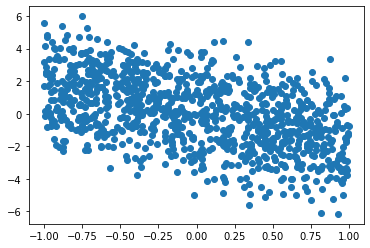

In [8]:
plt.scatter(X[:,2], y)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=250)

In [10]:
print("Tamaño del dataset de entrenamiento:", X_train.shape[0])
print("Tamaño del dataset de testeo:", X_test.shape[0])

Tamaño del dataset de entrenamiento: 750
Tamaño del dataset de testeo: 250


In [11]:
modelo = linear_model.LinearRegression()

In [12]:
modelo = modelo.fit(X_train, y_train)

In [13]:
print("Coeficientes reales:\t ", beta[:,0])
print("Coeficientes estimados:\t ", modelo.coef_[0])

Coeficientes reales:	  [ 2.63948701 -0.67222323 -1.98945287]
Coeficientes estimados:	  [ 2.63170243 -0.75081813 -1.89526337]


In [14]:
print("Coeficientes reales:\t ", beta[:,0])
print("Coeficientes estimados:\t ", modelo.coef_[0])

Coeficientes reales:	  [ 2.63948701 -0.67222323 -1.98945287]
Coeficientes estimados:	  [ 2.63170243 -0.75081813 -1.89526337]


In [15]:
y_pred = modelo.predict(X_test)
print(y_pred)

[[ 0.84156589]
 [-1.18003488]
 [-0.60744007]
 [-0.75227985]
 [ 0.07520479]
 [ 2.19957566]
 [ 0.63818751]
 [-3.06328636]
 [-4.12992807]
 [-1.00191783]
 [ 3.85302487]
 [ 0.49459465]
 [-3.4896247 ]
 [ 0.819991  ]
 [ 2.50830281]
 [-2.8925766 ]
 [ 1.77177693]
 [-1.61787111]
 [-0.36969839]
 [-2.88123088]
 [-0.71315797]
 [-0.14056883]
 [-2.99577726]
 [-0.9135733 ]
 [-0.55174261]
 [-1.08432171]
 [-1.96124617]
 [-2.33921254]
 [-0.39437038]
 [-0.4917057 ]
 [-1.53597872]
 [ 1.67465679]
 [ 2.21930128]
 [-2.61129948]
 [ 1.05353006]
 [ 0.23440915]
 [-0.84730334]
 [ 0.34950575]
 [ 3.11783392]
 [ 0.71615473]
 [ 2.84786391]
 [-2.81080748]
 [-0.93303462]
 [ 0.22839251]
 [ 1.5959599 ]
 [ 3.62551436]
 [-3.81589555]
 [ 2.95794107]
 [ 2.60901027]
 [-4.04584254]
 [-1.75704628]
 [-0.14706933]
 [ 0.16313067]
 [-1.92700265]
 [ 0.33885605]
 [ 1.24969797]
 [-0.49428864]
 [-1.13459353]
 [ 0.96038807]
 [-1.29821111]
 [ 0.12818576]
 [-1.71597161]
 [-1.01130313]
 [ 2.86578302]
 [-4.38901157]
 [ 3.17321971]
 [-0.04642

In [16]:
modelo.score(X_train, y_train)

0.7855429021179814

### Aprendizaje no supervisado
Como vimos, en aprendizaje no supervisado no tenemos "etiquetas", sino que tratamos de descubrir patrones en los datos.

#### Clustering
Vamos a ver un ejemplo de un algoritmo de clustering: $k$-medias ($k$-means en inglés).

Primero simulemos algunos datos con una estructura de clusters subyacente. Esto lo hacemos utilizando una función de scikit-learn llamada `make_blobs`:

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, random_state=0)

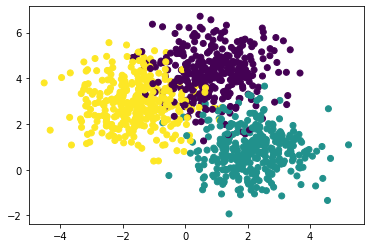

In [18]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [19]:
print(y)

[2 0 2 2 2 1 0 0 1 0 1 2 2 0 0 1 2 1 0 0 2 1 2 0 0 0 0 0 1 1 2 2 2 0 2 1 1
 2 1 1 1 1 0 1 1 1 1 2 0 1 0 0 1 0 0 1 1 2 2 1 2 2 2 2 0 0 1 1 2 2 0 0 0 2
 0 2 1 0 2 2 2 0 0 0 0 0 0 1 0 1 0 1 1 2 1 2 0 1 0 2 0 2 2 1 0 0 2 0 1 1 0
 0 0 0 2 2 0 2 0 1 0 1 2 0 0 1 2 2 2 0 0 2 0 0 2 0 0 1 2 2 0 0 0 2 2 2 0 0
 2 0 0 2 0 0 0 2 0 1 1 2 0 0 0 0 0 0 2 0 1 1 1 2 2 2 2 0 1 0 0 2 0 0 0 1 1
 0 2 1 2 0 1 2 1 2 2 0 0 2 1 1 0 2 1 0 0 2 2 2 1 0 2 0 0 0 1 2 0 2 0 0 2 0
 2 2 0 1 0 0 0 2 2 1 2 1 0 1 0 1 2 2 2 2 2 2 0 2 2 0 1 1 1 1 2 2 1 0 1 0 2
 1 0 1 1 1 0 1 2 2 2 0 2 1 2 2 2 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 0 2 1 1 1 0
 0 1 0 1 1 1 1 2 0 0 1 0 0 0 2 0 2 0 2 1 0 1 0 1 0 1 2 0 1 2 1 2 0 1 1 2 2
 2 0 2 0 2 0 1 0 1 1 2 1 1 0 1 0 1 0 0 2 2 1 2 0 0 0 0 1 2 1 1 2 2 0 2 0 1
 1 1 1 0 2 1 2 0 2 2 0 2 2 1 1 2 2 1 2 1 2 2 1 0 0 2 1 2 1 1 1 0 0 0 1 2 0
 1 1 2 0 0 2 0 2 0 1 1 1 2 0 2 1 0 0 1 2 1 1 2 0 2 0 2 2 1 2 2 1 1 0 1 0 0
 0 2 1 0 1 2 2 1 0 1 0 0 1 0 2 1 2 2 2 1 0 2 0 0 0 0 0 0 1 0 1 0 0 0 2 2 1
 2 2 2 1 1 1 1 2 0 1 0 2 

In [20]:
from sklearn import cluster
clustering = cluster.KMeans(n_clusters=3)

In [21]:
clustering.fit(X)

KMeans(n_clusters=3)

In [22]:
# etiquetas de los clusters encontrados
print(clustering.labels_)

[1 2 1 1 1 0 1 2 0 2 0 1 1 2 2 0 1 0 2 2 1 0 1 2 2 2 2 1 0 0 1 1 1 2 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 2 0 2 2 0 2 2 0 0 1 1 0 1 1 1 1 2 2 0 0 1 1 2 2 2 1
 2 1 0 2 1 1 1 2 2 2 2 2 2 0 2 0 2 0 0 1 0 1 2 0 2 1 2 2 2 0 2 2 1 2 0 0 2
 2 2 0 1 1 2 1 2 0 2 0 1 1 2 0 1 1 1 2 2 1 2 2 1 2 2 0 1 1 2 2 2 1 1 2 2 2
 1 2 2 1 2 2 2 1 2 0 0 1 2 2 2 2 0 2 1 2 0 0 0 1 1 1 1 2 0 2 2 1 2 2 2 0 0
 2 0 0 1 2 2 1 0 2 2 2 1 0 0 0 2 1 0 0 2 1 1 1 0 2 1 2 2 2 0 1 2 1 2 2 1 0
 1 1 2 0 1 2 2 1 1 2 2 0 2 0 2 0 1 1 1 1 1 1 2 1 1 1 0 0 0 0 1 1 0 2 0 1 1
 0 2 0 0 0 2 0 1 1 1 2 1 0 1 0 1 1 2 0 1 1 0 2 0 0 2 2 1 1 0 1 2 1 0 0 0 2
 2 0 2 0 0 0 0 1 2 2 0 2 2 2 1 2 2 2 1 0 1 0 2 0 2 0 1 2 0 1 0 1 2 0 0 1 1
 1 2 1 2 1 2 0 2 0 0 1 0 0 2 0 2 0 2 2 1 2 0 1 2 2 2 0 0 1 0 0 1 1 2 1 2 0
 0 0 0 2 1 0 1 2 1 1 2 1 1 0 2 1 1 0 1 0 1 1 0 2 2 1 0 1 0 0 0 2 2 2 0 1 2
 0 0 1 2 2 1 2 1 2 2 1 0 1 1 1 0 2 2 0 1 0 0 1 2 1 1 1 1 0 1 1 2 0 2 0 0 2
 2 1 0 2 0 1 1 0 2 2 2 2 0 1 1 0 1 1 1 2 2 1 2 2 2 2 2 0 0 2 0 2 2 2 1 1 0
 1 1 1 0 0 0 0 1 1 0 2 1 

In [23]:
print(
  sklearn.metrics.confusion_matrix(y_pred=clustering.labels_, y_true=y)
)

[[ 12  29 293]
 [316   2  15]
 [  5 309  19]]


## Aprendizaje profundo

En esta parte vamos a ver los fundamentos del aprendizaje profundo. Vamos a ver cómo funcionan las redes neuronales convolucionales (CNNs), que es el tipo de red neuronal que se usa para procesamiento de imágenes.
Luego vamos a implementar una red neuronal convolucional que aprende a reconocer dígitos.

### Teoría
#### ¿Qué es una red neuronal artificial (ANN)?
Una red neuronal artificial es un modelo matemático que se puede representar como una sucesión de _capas_ que van desde los datos de entrada ($X$) a los datos de salida ($y$, o etiquetas). Cada capa se "comunica" sólo con la inmediata anterior y posterior.

![caption](figuras/NN.png)

Las capas intermedias se llaman _capas ocultas_ o _latentes_. Cada neurona de una capa recibe como entrada una combinación lineal de las salidas de las neuronas de la capa anterior. 

Cada flecha en la figura de arriba representa el _peso_ que le damos a la neurona de la izquierda en la entrada de la neurona de la derecha.

Estos pesos son los parámetros que la red "aprende", de la misma manera que en una regresión lineal sencilla ajustábamos pendiente y ordenada al origen de la recta.

**Pregunta**: *¿Cuántos parámetros "ajustables" tiene la red de arriba?*

#### Funciones de activación
Como sabemos de álgebra lineal, el proceso que describimos hasta ahora equivale a multiplicar vectores por matrices sucesivas veces, es decir hacer $y = B(Ax)$.

Pero esto es equivalente a multiplicar por una sola matriz $C=BA$, es decir, a no tener ninguna capa oculta!

En lugar de hacer esto, para tener más flexibilidad en el tipo de comportamiento que la red captura, en cada capa utilizamos una **función de activación no lineal**.

#### ¿Cómo entrenamos una red neuronal?
En general usamos una técnica **iterativa** que se llama *descenso por gradiente*, donde la "x" es el vector de todos los parámetros de la red (la derivada se convierte en un gradiente) y la función que queremos optimizar es una medida del error que la red está cometiendo en la iteración presente. 

Esta función a optimizar se llama **función de pérdida** (*loss function*) o **función de costo**.

![caption](figuras/gradient_descent.png)

Para calcular el gradiente respecto de cada uno de los parámetros, se debe aplicar la **regla de la cadena** debido a las interdependencias que hay entre las distintas neuronas de la red. La aplicación de la regla en la cadena para redes neuronales se llama **retropropagación**.

En cada iteración, el valor de los pesos de la red se corrige en una cantidad dada por el gradiente de la función de pérdida.

#### Ver también
- [Este](https://www.youtube.com/watch?v=aircAruvnKk) es un video **muy bueno** para ganar una mejor intuición de lo que ocurre en una red neuronal.
- Estos videos del mismo canal explican la matemática detrás de cómo se entrena una red:
  - [Descenso por gradiente](https://www.youtube.com/watch?v=IHZwWFHWa-w)
  - [Retropropagación](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

Así luce una función de pérdida real (respecto a sólo dos parámetros!):
![caption](figuras/loss_function_nn.jpeg)

### Implementación

Vamos a ver cómo usar PyTorch para implementar redes neuronales.
Para importar la librería, ejecutamos:

In [24]:
import torch

In [25]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [26]:
print("La versión de PyTorch que tengo instalada es la %s." % (torch.__version__))

La versión de PyTorch que tengo instalada es la 1.9.0.


¿Cómo hacemos para generar la red neuronal de más arriba?

Primero, definamos la **arquitectura** de la red neuronal: 2 neuronas de entrada, 1 capa oculta con 3 neuronas y 2 neuronas de salida.

Para ello tenemos que construir una clase que _herede_ de `nn.Module` (¿recuerdan herencia de clases [semana 3]?)

In [27]:
class NuestraPrimeraRed(nn.Module):
    
    def __init__(self):
        super(NuestraPrimeraRed, self).__init__()
        self.capa12 = nn.Linear(2, 3)
        self.capa23 = nn.Linear(3, 2)
        
    def forward(self, x):
        x = self.capa12(x)
        x = F.sigmoid(x)
        y = self.capa23(x)
        return y

Listo!

Ahora podemos inicializar el modelo, llamando al constructor de la clase:

En el siguiente ejemplo vamos a ver cómo entrenaríamos una red.

#### Redes neuronales convolucionales (CNNs)

Las CNNs se basan en el uso de **filtros convolucionales**.

Por ejemplo, este filtro produce una nueva imagen que resalta los bordes horizontales:
<img src="figuras/filtro_convolucional.png" alt="Drawing" style="width: 200px;"/>

![caption](figuras/cnn.png)

### Datos

Vamos a trabajar con un dataset llamado **MNIST**, el cual contiene imágenes de dígitos de 28x28 píxeles.

Para bajarlo, podemos usar PyTorch:

In [29]:
from torchvision import datasets
from torchvision import transforms

In [30]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

(En [este link](https://pytorch.org/docs/stable/torchvision/datasets.html) van a poder encontrar otros datasets.)

Examinemos un poco los datos:

In [31]:
print(mnist_trainset.classes)
print(mnist_trainset.train_labels)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
tensor([5, 0, 4,  ..., 5, 6, 8])


/home/rodrigo/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


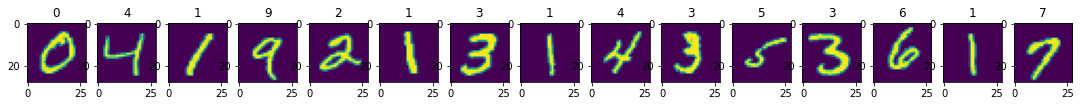

In [32]:
# Visualicemos las imágenes

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 10))
for i in range(1, 16):
    img = transforms.ToPILImage(mode='L')(mnist_trainset[i][0])
    fig.add_subplot(1, 16, i)
    plt.title(mnist_trainset[i][1])
    plt.imshow(img)
plt.show()


In [33]:
print(mnist_trainset.data.shape)
print(mnist_trainset.data[0].shape)

torch.Size([60000, 28, 28])
torch.Size([28, 28])


### Preparemos los datos

In [34]:
from torch.utils.data import Subset

mnist_valset, mnist_testset = torch.utils.data.random_split(mnist_testset, [int(0.9 * len(mnist_testset)), int(0.1 * len(mnist_testset))])

# para traernos un subconjuntos de los datos
# train_dataloader = torch.utils.data.DataLoader(Subset(mnist_trainset, range(5000)), batch_size=64, shuffle=True,)
# val_dataloader = torch.utils.data.DataLoader(Subset(mnist_valset, range(1000)), batch_size=32, shuffle=False)
# test_dataloader = torch.utils.data.DataLoader(Subset(mnist_testset, range(500)), batch_size=32, shuffle=False)

train_dataloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_valset, batch_size=32, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(mnist_testset, batch_size=32, shuffle=False)

0) Definamos la arquitectura de la red neuronal

In [61]:
class NuestraSegundaRed(nn.Module):
    def __init__(self):
        super(NuestraSegundaRed, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.softmax(x, dim=1)
        return output

1) Inicializamos el modelo

In [62]:
modelo = NuestraSegundaRed()

1) Definimos la **función de pérdida**. En este caso usamos la *entropía cruzada* (`CrossEntropyLoss`), que es la forma estándar de medir el error cuando la salida es una variable categórica (en lugar de una continua):

In [63]:
criterio = torch.nn.CrossEntropyLoss()

2) Definimos el algoritmo que vamos a usar para entrenar la red (el **optimizador**):

In [64]:
optimizador = torch.optim.Adam(modelo.parameters(), lr=0.001)

### Entrenamiento de la red

In [65]:
import time

In [67]:
no_epochs = 5
train_loss = list()
val_loss = list()
best_val_loss = 1

for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    modelo.train()

    # training
    for itr, (image, label) in enumerate(train_dataloader):
        optimizador.zero_grad()

        pred = modelo(image)

        loss = criterio(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizador.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    
    # validation
    modelo.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):
        pred = modelo(image)

        loss = criterio(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    hora = time.strftime("%H:%M:%S") 
    print('\n{} - Epoch: {}/{}, Train Loss: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(hora, epoch + 1, no_epochs, total_train_loss, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(modelo.state_dict(), "checkpoints/model.dth")


19:04:32 - Epoch: 1/5, Train Loss: 1.50962059, Val Loss: 1.48255651, Val Accuracy: 0.97844444

19:05:59 - Epoch: 2/5, Train Loss: 1.49903505, Val Loss: 1.47742263, Val Accuracy: 0.98411111

19:07:30 - Epoch: 3/5, Train Loss: 1.49493499, Val Loss: 1.47705561, Val Accuracy: 0.98388889

19:09:01 - Epoch: 4/5, Train Loss: 1.49082460, Val Loss: 1.47679338, Val Accuracy: 0.98422222

19:10:36 - Epoch: 5/5, Train Loss: 1.48953113, Val Loss: 1.47530290, Val Accuracy: 0.98588889


Podemos cargar los parámetros del modelo ya entrenado desde el archivo que guardamos en la celda de arriba

In [91]:
modelo.load_state_dict(torch.load("checkpoints/model_preentrenado.dth"))

<All keys matched successfully>

In [92]:
import PIL

In [93]:
import os

In [117]:
def f(archivo):
    a = PIL.Image.open(archivo)
    a = np.asarray(a)
    a = torch.Tensor(a)
    a = a.expand(1,1,28,28)
    print(modelo(a).argmax())

In [118]:
import ipywidgets as widgets
from ipywidgets import interact

In [120]:
interact(f, archivo=widgets.Dropdown(options=[x for x in os.listdir() if x.endswith("png")]));

interactive(children=(Dropdown(description='archivo', options=('matias_5.png', 'belen_siete.png', 'rodrigo_7.p…

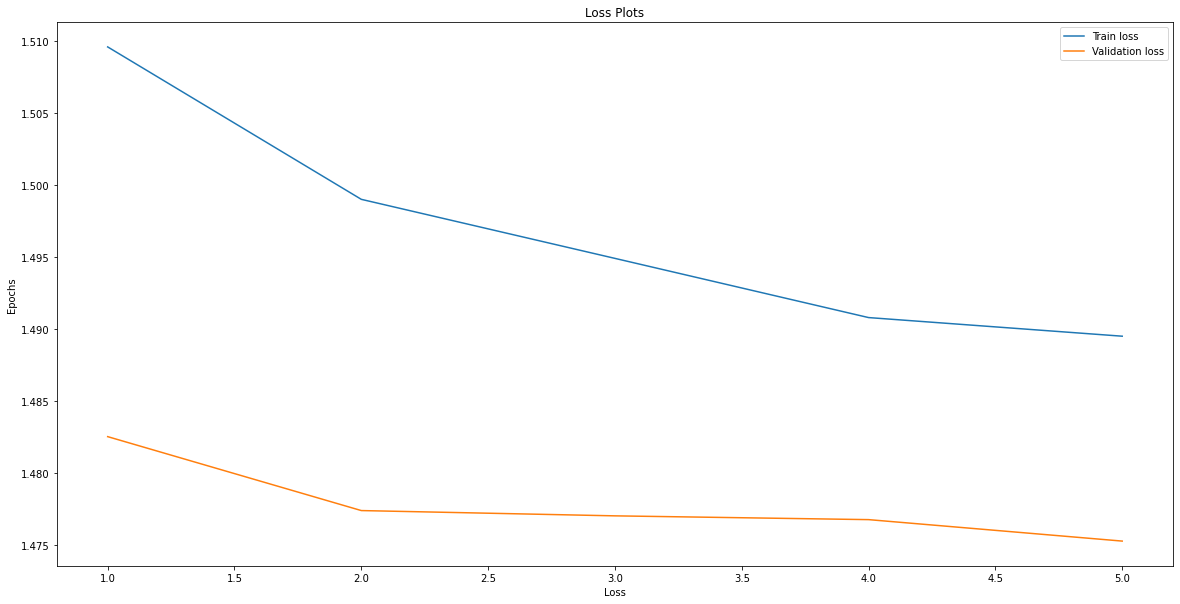

In [96]:
import numpy as np

fig=plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, no_epochs+1), train_loss, label="Train loss")
plt.plot(np.arange(1, no_epochs+1), val_loss, label="Validation loss")
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title("Loss Plots")
plt.legend(loc='upper right')
# plt.show()
plt.savefig('loss.png')